In [1]:
import glob

import csv
import statistics
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

plt.style.use(['science', 'ieee', 'no-latex'])  #pip install SciencePlots==1.0.9

In [2]:
def imprt():
    M = {}
    P = {}
    
    with open('C:/Users/Coen/Documents/GitHub/CT_schedule/data/missions.csv', mode='r',encoding='utf-8-sig') as f:
        reader = csv.reader(f)
        for row in reader:
            M[row[0]] = np.genfromtxt(row[1:10], dtype='int')
    
    with open('C:/Users/Coen/Documents/GitHub/CT_schedule/data/pilots.csv', mode='r',encoding='utf-8-sig') as f:
        reader = csv.reader(f)
        for row in reader:
            P[row[0]] = np.genfromtxt(row[1:6], dtype='int')
    return M, P

In [3]:
def read_history_live(hist):
    no_sorties = list()
    min_CT = 0 
    for p in P: 
        total_sorties_p = sum(hist[p].values())
        no_sorties.append(total_sorties_p)
        if P[p][4] > 0:
            check_min = total_sorties_p >= 41
        else:
            check_min = total_sorties_p >= 58
        count = 0
        for m in M:     
            if hist[p][m] - M[m][P[p][0]] < 0:
                count += 1
                print(f'min LIVE failed for pilot {p} on mission {m}')
        if count <= 0 and check_min:
            min_CT += 1
    des_CT = 0 
    sorties = sum([sum(hist[k].values()) for k in hist.keys()])
    for p in P:
        total_sorties_p = sum(hist[p].values())
        if P[p][4] > 0:
            check_desired = total_sorties_p >= 69
        else:
            check_desired = total_sorties_p >= 73
        count = 0
        for m in M:
            if hist[p][m] - M[m][P[p][1]] < 0:
                count += 1
                print(f'desired LIVE failed for pilot {p} on mission {m}')
        if count <= 0 and check_desired:
            des_CT += 1
    
    return min_CT, des_CT, sorties, no_sorties

In [4]:
def read_history_sim(hist_sim):
    no_sorties = list()
    min_CT = 0 
    for p in P: 
        total_sorties_p = sum(hist_sim[p].values())
        no_sorties.append(total_sorties_p)
        if P[p][4] > 0:
            check_min = total_sorties_p >= 37
        else:
            check_min = total_sorties_p >= 42
        count = 0
        for m in M:     
            if hist_sim[p][m] - M[m][P[p][2]] < 0:
                count += 1
                print(f'min SIM failed for pilot {p} on mission {m}')
        if count <= 0 and check_min:
            min_CT += 1
    des_CT = 0 
    sorties = sum([sum(hist_sim[k].values()) for k in hist.keys()])
    for p in P:
        total_sorties_p = sum(hist[p].values())
        if P[p][4] > 0:
            check_desired = total_sorties_p >= 53
        else:
            check_desired = total_sorties_p >= 72
        count = 0
        for m in M:
            if hist_sim[p][m] - M[m][P[p][P[p][3]]] < 0:
                count += 1
                print(f'desired SIM failed for pilot {p} on mission {m}')
        if count <= 0 and check_desired:
            des_CT += 1
    
    return min_CT, des_CT, sorties, no_sorties

In [5]:
M, P = imprt()

In [6]:
data = np.full((len(glob.glob('*CTresults_live.txt')),6), 0)
i = 0
print('live missions:')
for file in glob.glob('*CTresults_live.txt'):
    with open(file) as f:
        hist = json.load(f)
        min_CT, des_CT, sorties, no_sorties_live = read_history_live(hist)
        data[i][0] = min_CT
        data[i][1] = des_CT
        data[i][2] = sorties
        i += 1
i = 0
print('sim missions:')
for simfile in glob.glob('*CTresults_sim.txt'):
    with open(simfile) as g:
        hist_sim = json.load(g)
        min_CT, des_CT, sorties, no_sorties_sim = read_history_sim(hist_sim)
        data[i][3] = min_CT
        data[i][4] = des_CT
        data[i][5] = sorties
        i += 1

live missions:
min LIVE failed for pilot Hollywood on mission AI_n_4
min LIVE failed for pilot Chipper on mission AI_n_4
desired LIVE failed for pilot Hollywood on mission AI_n_4
desired LIVE failed for pilot Chipper on mission AI_n_4
min LIVE failed for pilot Sundown on mission OCA_d_2
desired LIVE failed for pilot Sundown on mission OCA_d_2
desired LIVE failed for pilot Sundown on mission SDEAD_d_4
min LIVE failed for pilot Charlie on mission SDEAD_n_4
desired LIVE failed for pilot Hollywood on mission DCA_d_4
desired LIVE failed for pilot Hollywood on mission CAS_d_4
desired LIVE failed for pilot Charlie on mission SDEAD_n_4
desired LIVE failed for pilot Chipper on mission DCA_d_4
min LIVE failed for pilot Stinger on mission OCA_d_4
desired LIVE failed for pilot Sundown on mission CAS_d_4
desired LIVE failed for pilot Stinger on mission OCA_d_4
desired LIVE failed for pilot Stinger on mission DCA_d_4
desired LIVE failed for pilot Jester on mission SDEAD_d_4
desired LIVE failed for p

In [7]:
pilotFL = list()
for p in P:
    pilotFL.append(P[p][4])
print(no_sorties_live)
print(sum(no_sorties_live))
print(no_sorties_sim)
print(sum(no_sorties_sim))
print(pilotFL)
for i in range(len(no_sorties_live)):
    print(no_sorties_live[i]+(no_sorties_sim[i]))

[80, 77, 85, 83, 82, 79, 84, 79, 82, 82, 83, 81, 85, 84, 80, 85, 78, 84]
1473
[64, 64, 66, 65, 83, 78, 80, 83, 65, 68, 68, 70, 80, 87, 87, 82, 69, 64]
1323
[4, 4, 2, 2, 0, 0, 0, 0, 4, 4, 2, 2, 0, 0, 0, 0, 4, 4]
144
141
151
148
165
157
164
162
147
150
151
151
165
171
167
167
147
148


In [21]:
comp = []
for i in range(len(data)):
    print(data[i])
    print(min(data[i]))
    comp.append(min(data[i]))

[  18   18 1550   18   16 1394]
16
[  16   16 1539   18   18 1385]
16
[  17   17 1565   18   18 1379]
17
[  17   15 1526   18   17 1362]
15
[  17   14 1505   18   13 1357]
13
[  16   16 1581   18   15 1403]
15
[  17   15 1541   18   17 1378]
15
[  15   15 1553   18   16 1362]
15
[  16   15 1536   18   17 1392]
15
[  18   18 1551   18   17 1382]
17
[  17   17 1574   18   17 1400]
17
[  18   17 1541   18   18 1418]
17
[  16   15 1563   18   15 1377]
15
[  16   16 1552   18   17 1390]
16
[  17   17 1573   18   16 1365]
16
[  15   13 1548   18   16 1360]
13
[  17   16 1546   18   17 1394]
16
[  16   16 1550   18   16 1398]
16
[  16   16 1575   18   18 1399]
16
[  17   16 1560   18   17 1404]
16
[  18   18 1541   18   17 1387]
17
[  16   16 1546   18   15 1359]
15
[  18   18 1566   18   18 1381]
18
[  17   17 1548   18   16 1392]
16
[  15   14 1532   18   18 1396]
14
[  16   15 1561   18   18 1422]
15
[  17   14 1534   18   16 1356]
14
[  16   14 1555   18   15 1351]
14
[  18   18 1539   18

In [22]:
print(sum(comp)/len(comp))

15.5


16
16
17
15
13
15
15
15
15
17
17
17
15
16
16
13
16
16
16
16
17
15
18
16
14
15
14
14
17
13


{'whiskers': [<matplotlib.lines.Line2D at 0x2ca0626d520>,
 'caps': [<matplotlib.lines.Line2D at 0x2ca06273c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ca0626d730>],
 'medians': [<matplotlib.lines.Line2D at 0x2ca06273550>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ca0626b100>],
 'means': []}

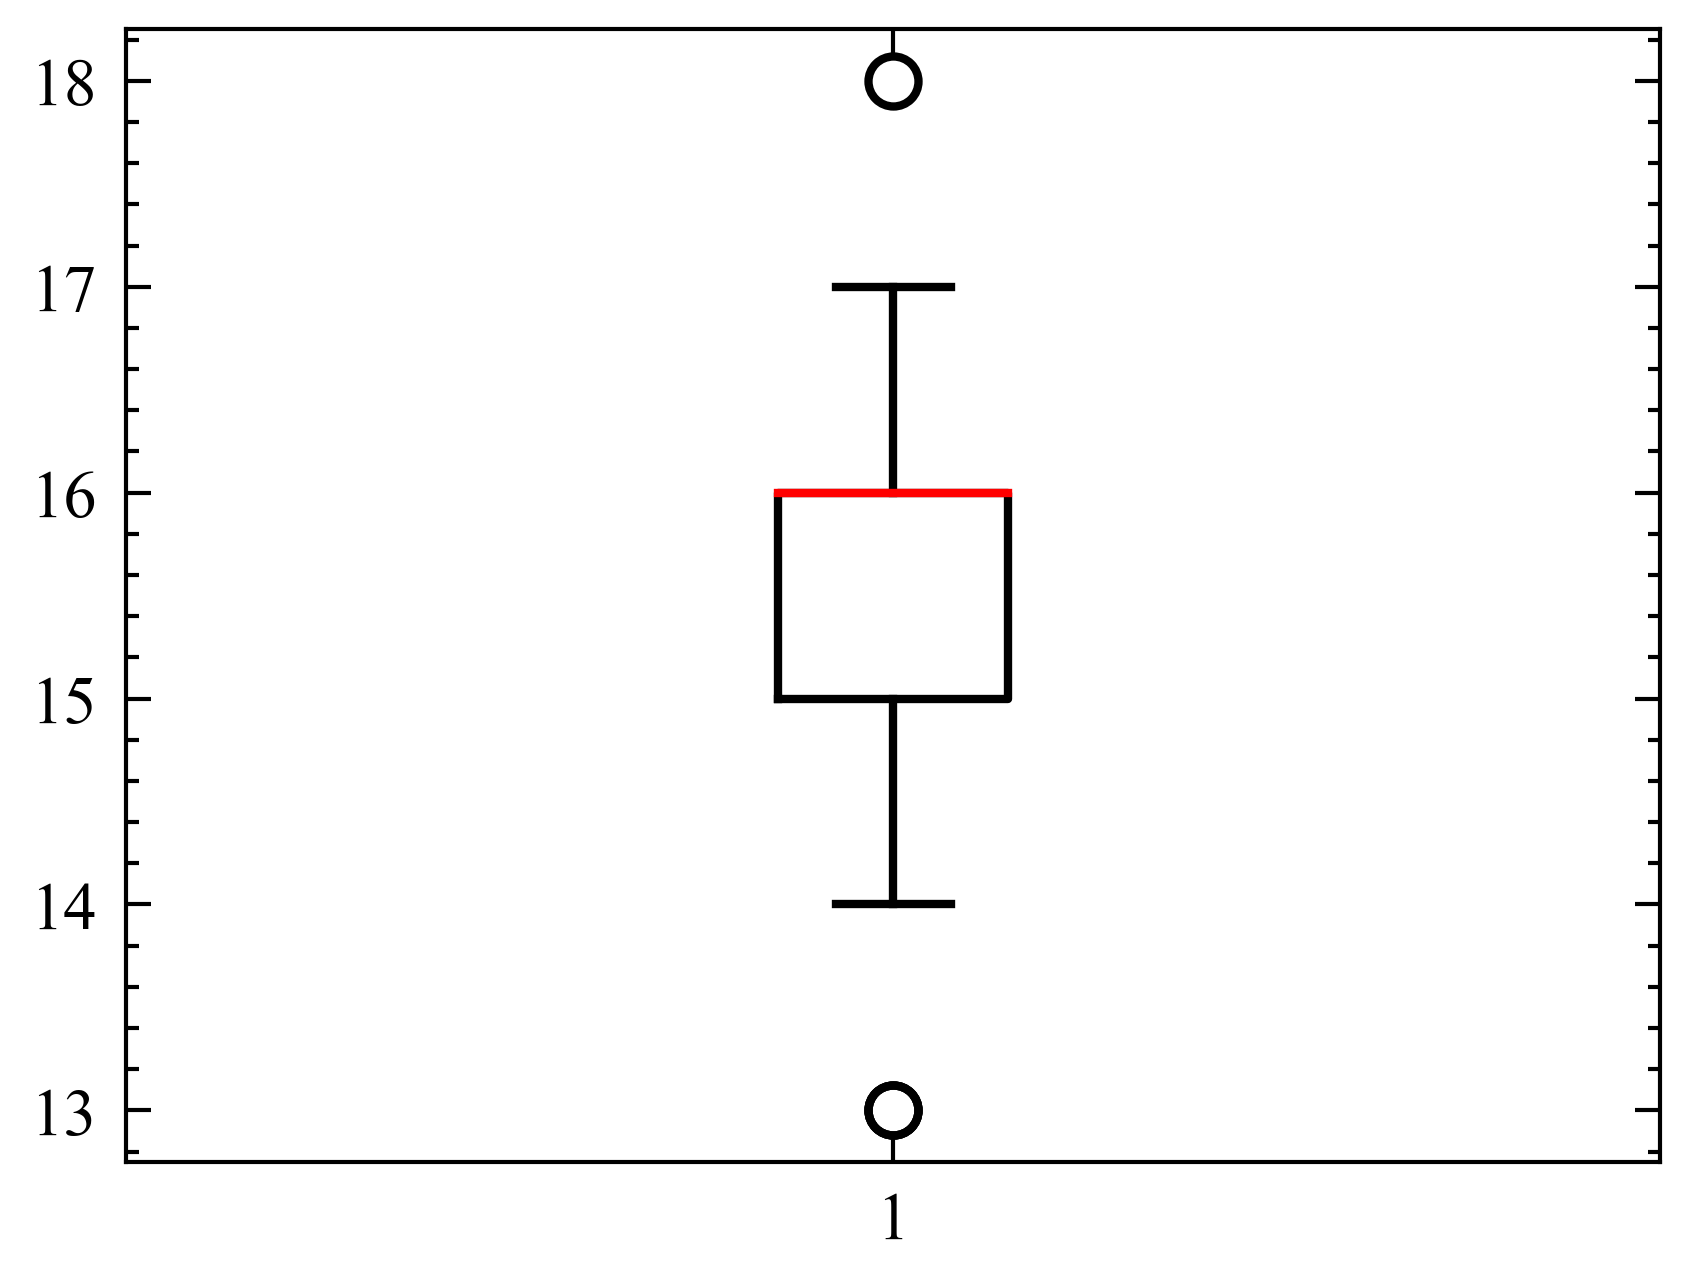

In [23]:
avgs = []
for i in range(len(data)):
    print(min(data[i]))
    avgs.append(min(data[i]))
plt.boxplot(avgs)

In [8]:
for i in range(len(data)):
    print(data[i,4])

16
18
18
17
13
15
17
16
17
17
17
18
15
17
16
16
17
16
18
17
17
15
18
16
18
18
16
15
17
14


In [9]:
for i in range(len(data)):
    print(min(data[i]))

16
16
17
15
13
15
15
15
15
17
17
17
15
16
16
13
16
16
16
16
17
15
18
16
14
15
14
14
17
13


In [10]:
run_data = []
for file in glob.glob('*_data.txt'):
    with open(file) as f:
        a = json.load(f)
        run_data.append(a["FHR_cummulative"])
print(run_data[0][1])

9.0


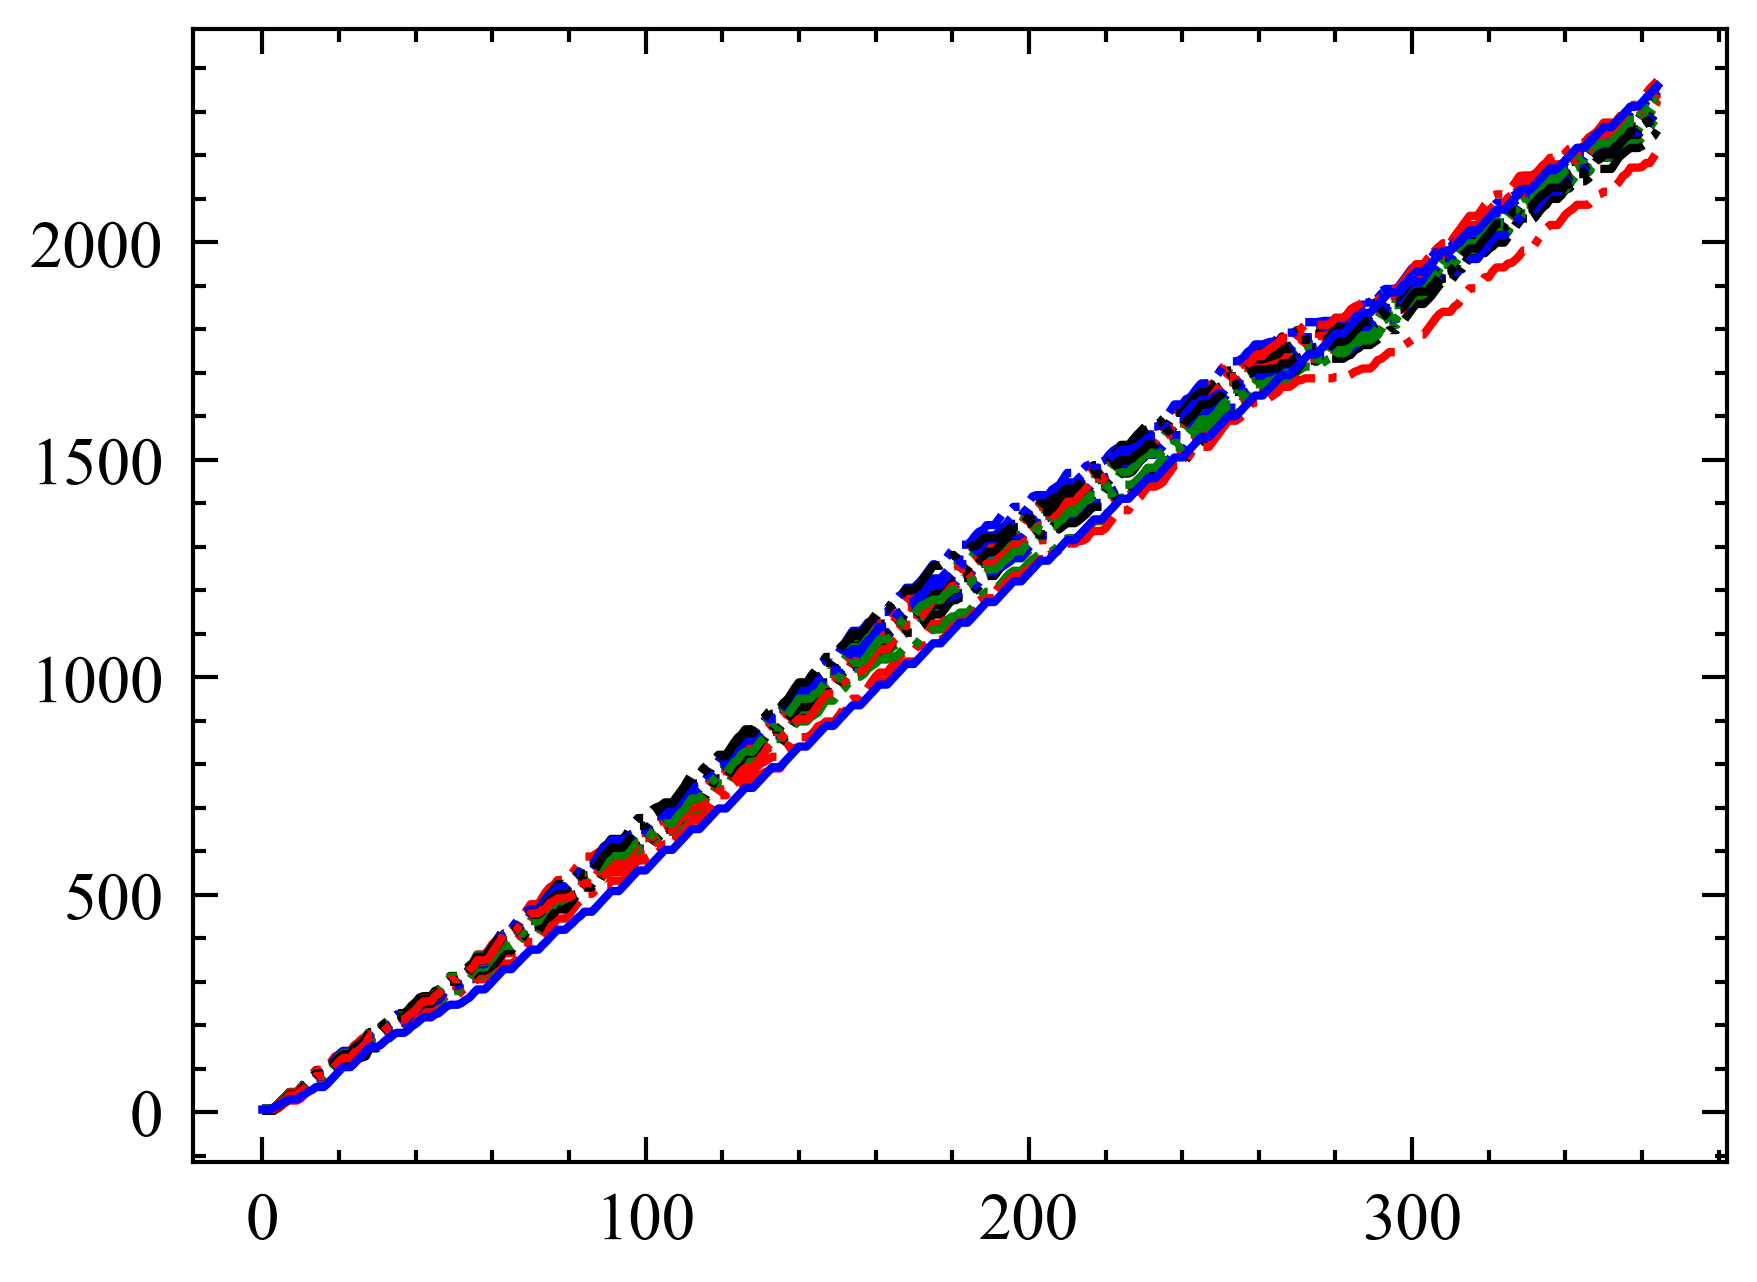

In [20]:
#for i in range(len(run_data)):
#    print(max(run_data[i]))
for i in range(len(run_data)):
    plt.plot(run_data[i], linestyle='dashdot')
plt.plot(a["FT_FMP"], linestyle='-')
plt.savefig('FHR.jpg', dpi=300)

In [12]:
bound = []

line_max = []
line_min = []
line_avg = []
for i in range(30):
    for j in range(len(run_data)):
        print(run_data[j][i])

9.0
9.0
4.5
7.5
4.5
9.0
9.0
9.0
9.0
9.0
9.0
4.5
9.0
9.0
9.0
9.0
4.5
4.5
4.5
4.5
9.0
4.5
4.5
9.0
4.5
9.0
9.0
9.0
4.5
7.5
9.0
9.0
4.5
7.5
4.5
9.0
9.0
9.0
9.0
9.0
9.0
4.5
9.0
9.0
9.0
9.0
4.5
4.5
4.5
4.5
9.0
4.5
4.5
9.0
4.5
9.0
9.0
9.0
4.5
7.5
9.0
9.0
4.5
7.5
4.5
9.0
9.0
9.0
9.0
9.0
9.0
4.5
9.0
9.0
9.0
9.0
4.5
4.5
4.5
4.5
9.0
4.5
4.5
9.0
4.5
9.0
9.0
9.0
4.5
7.5
9.0
9.0
4.5
7.5
4.5
9.0
9.0
9.0
9.0
9.0
9.0
4.5
9.0
9.0
9.0
9.0
4.5
4.5
4.5
4.5
9.0
4.5
4.5
9.0
4.5
9.0
9.0
9.0
4.5
7.5
18.0
9.0
13.5
16.5
13.5
18.0
18.0
18.0
18.0
18.0
16.5
13.5
13.5
18.0
13.5
18.0
13.5
9.0
13.5
13.5
18.0
9.0
13.5
16.5
13.5
18.0
13.5
13.5
12.0
15.0
27.0
18.0
22.5
25.5
22.5
27.0
27.0
27.0
27.0
27.0
25.5
22.5
19.5
27.0
22.5
21.0
22.5
18.0
19.5
15.0
27.0
15.0
21.0
25.5
22.5
24.0
22.5
22.5
21.0
24.0
36.0
22.5
31.5
34.5
31.5
36.0
36.0
34.5
36.0
36.0
34.5
31.5
22.5
36.0
27.0
30.0
31.5
22.5
24.0
24.0
34.5
24.0
30.0
34.5
31.5
33.0
31.5
31.5
30.0
28.5
42.0
27.0
37.5
45.0
42.0
46.5
45.0
45.0
46.5
46.5
45.0
42.0
33.0
46.5
37.

[2325.0, 2308.5, 2347.5, 2289.0, 2257.5, 2371.5, 2311.5, 2329.5, 2304.0, 2326.5, 2361.0, 2311.5, 2344.5, 2328.0, 2359.5, 2322.0, 2319.0, 2325.0, 2362.5, 2340.0, 2311.5, 2319.0, 2349.0, 2322.0, 2298.0, 2341.5, 2301.0, 2332.5, 2308.5, 2209.5]


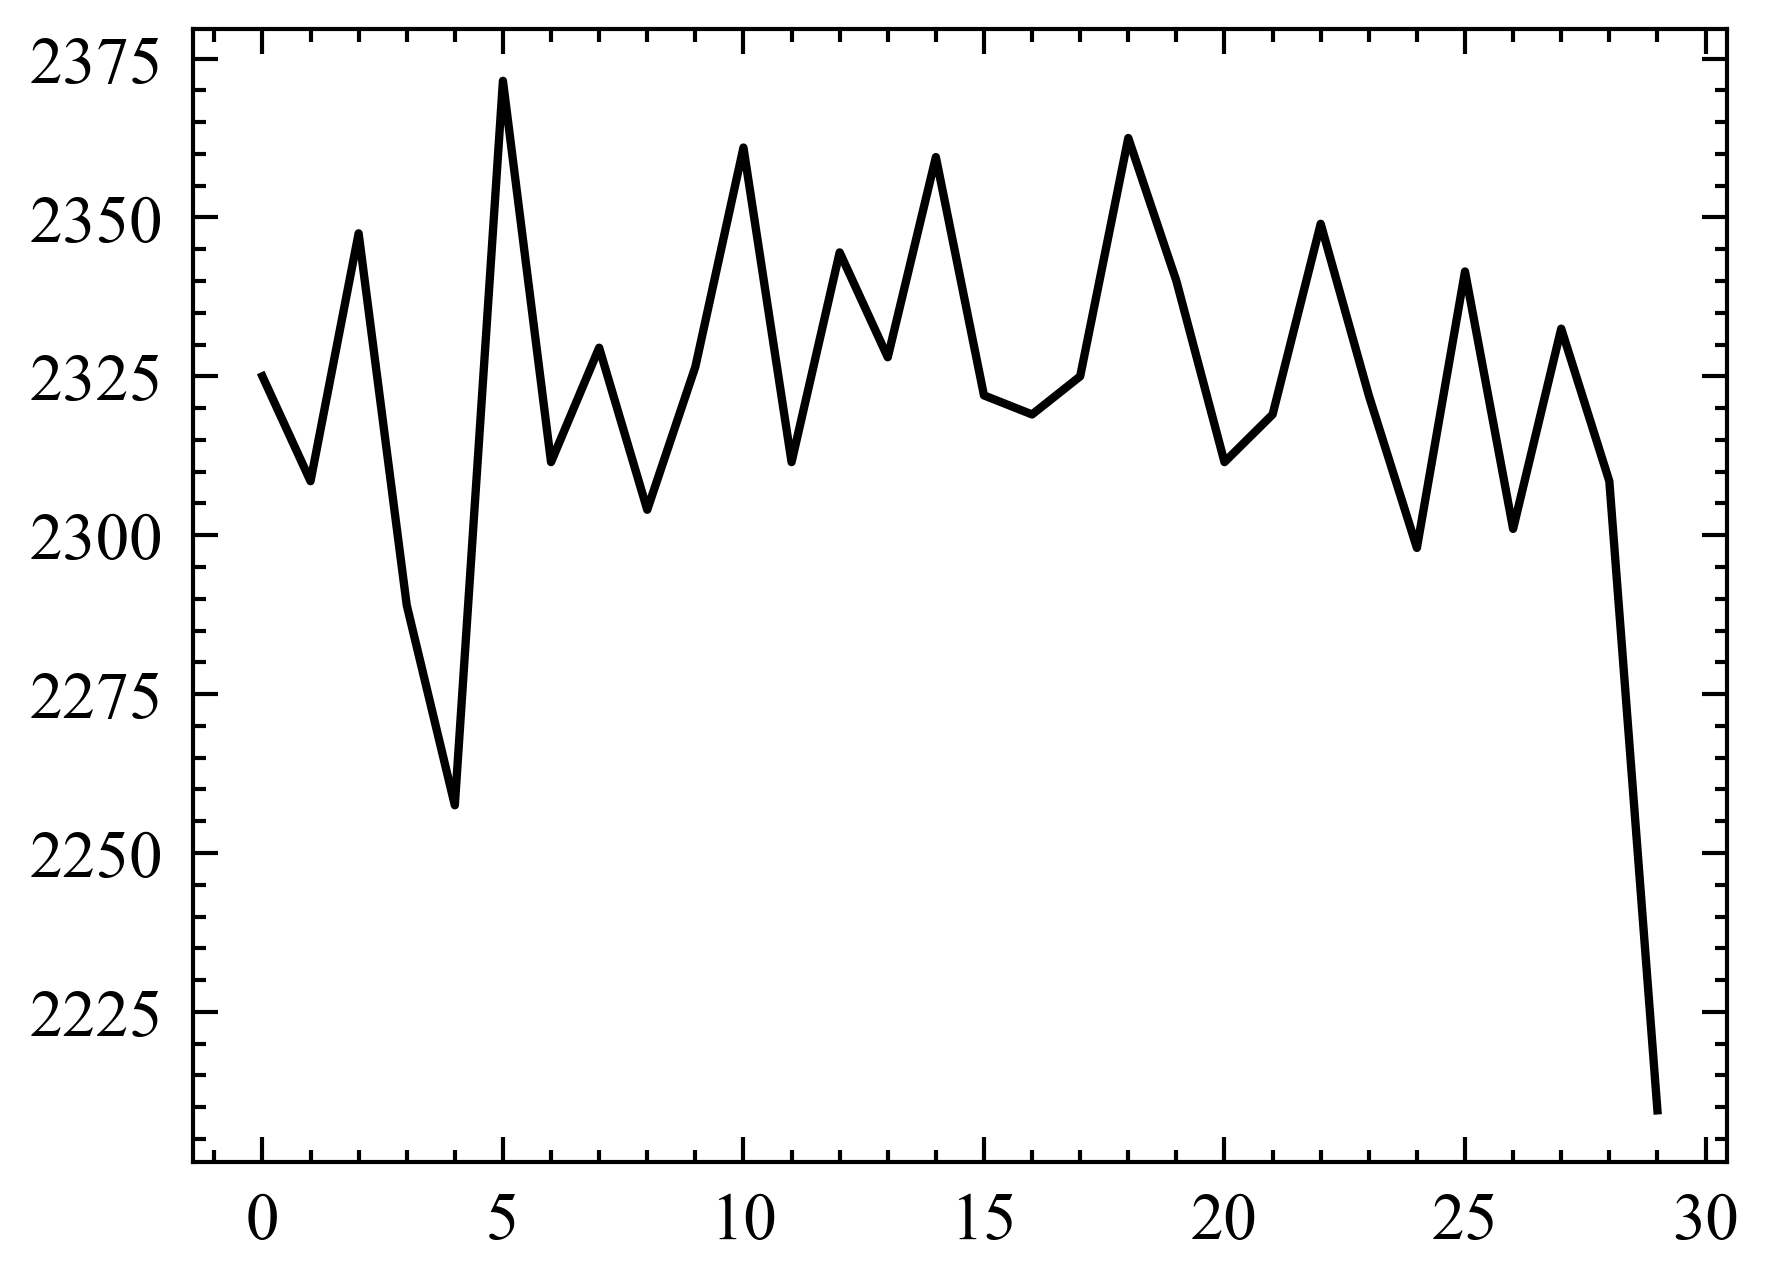

In [13]:
bound = []

line = []
for j in range(len(run_data)):
    line.append(max(run_data[j]))
print(line)
bound.append(line)
plt.plot(bound[0])


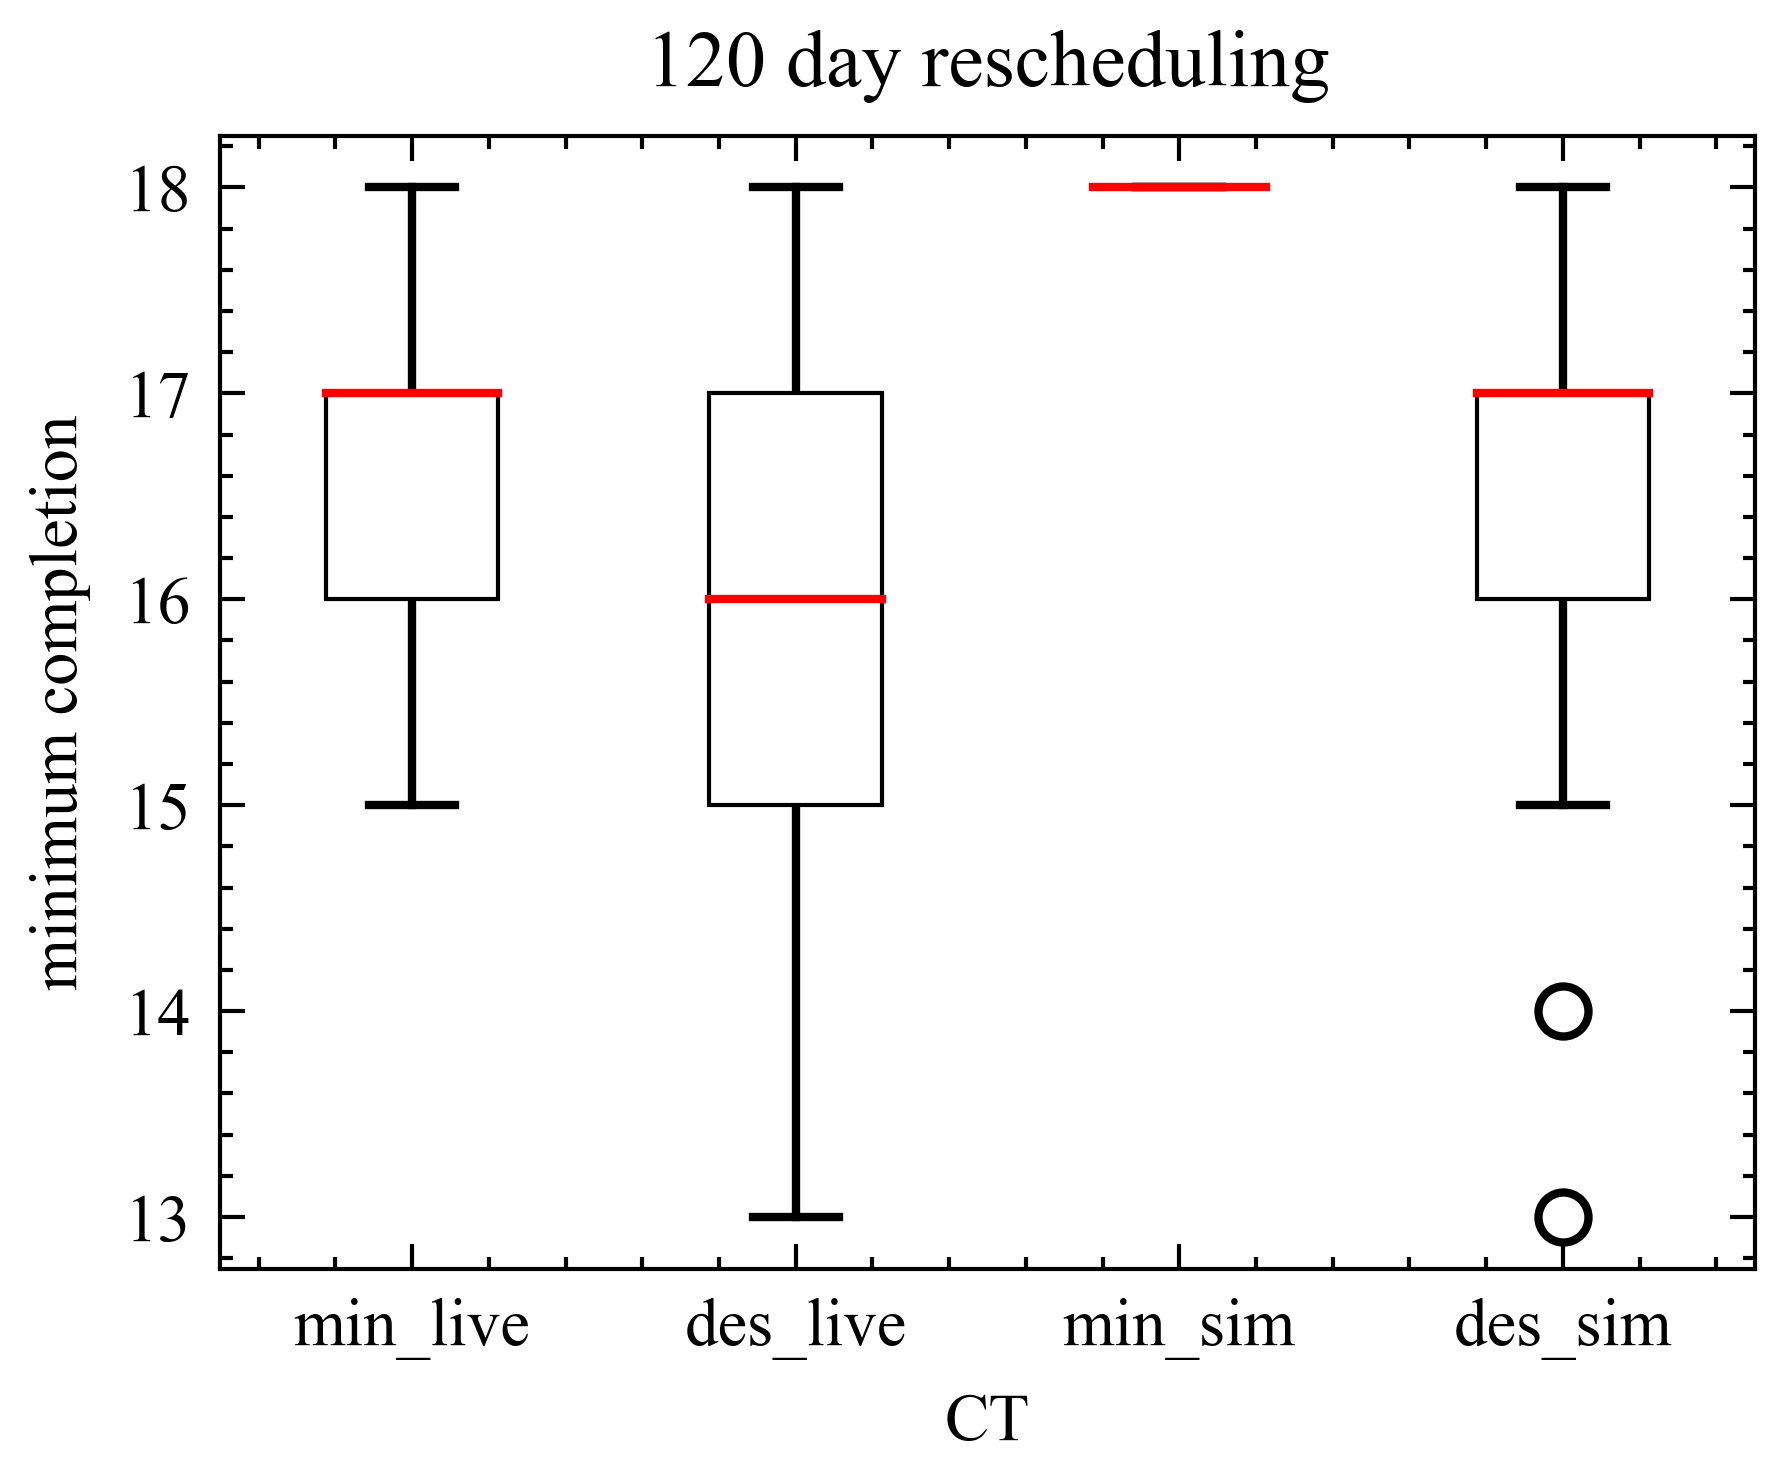

In [14]:
fig, ax = plt.subplots()
boxes = [data[0:30,0], data[0:30,1], data[0:30,3], data[0:30,4]]
bp = ax.boxplot(boxes, patch_artist=True)
ax.set(xlabel='CT'.format('Arial'))
ax.set(ylabel='minimum completion'.format('Arial'))
ax.set_title('120 day rescheduling'.format('Arial'))
ax.set_xticklabels(['min_live', 'des_live', 'min_sim', 'des_sim', f'{len(data)}'])
for box in bp['boxes']:
    box.set( color='k', linewidth=0.5)
    box.set( facecolor = 'w' )

for flier in bp['fliers']:
    flier.set(marker='o', color='r')#, alpha=0.5
fig.savefig('box.jpg', dpi=300)

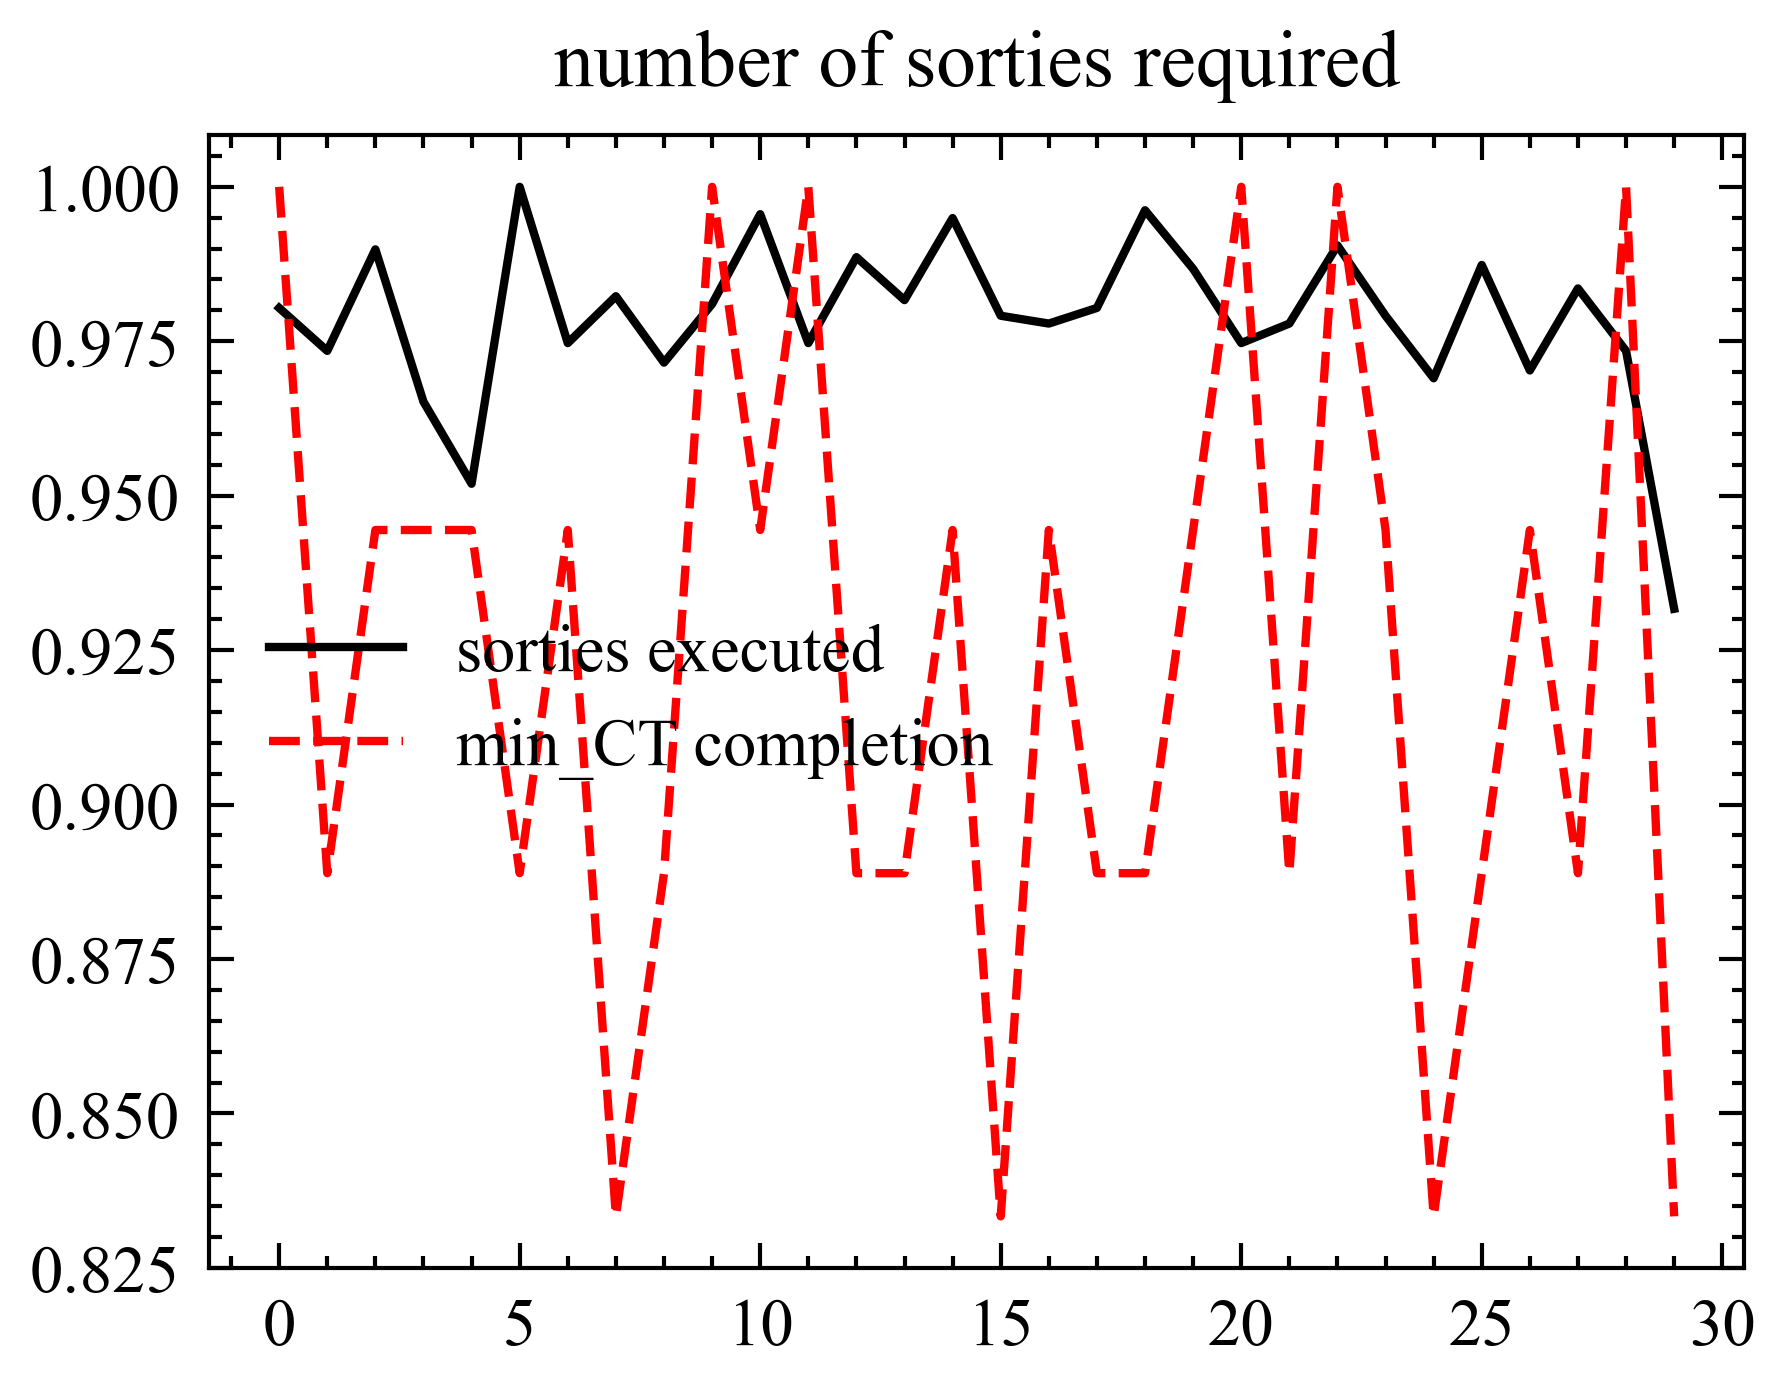

In [15]:
plt.plot(data[:,2]/max(data[:,2]), label='sorties executed')
plt.plot(data[:,0]/max(data[:,0]), c='r', label='min_CT completion')
plt.title('number of sorties required')
plt.legend()
plt.savefig('sorties_normalized.jpg', dpi=300)

In [16]:
covariance = np.cov(data[:,2]/max(data[:,2]), (data[:,0]/10))
r_pearson = pearsonr(data[:,2], data[:,0])
print(r_pearson[0]) #pearson r
print(r_pearson[1]) #significance for pearson r

0.14597699151415985
0.4414708796548332


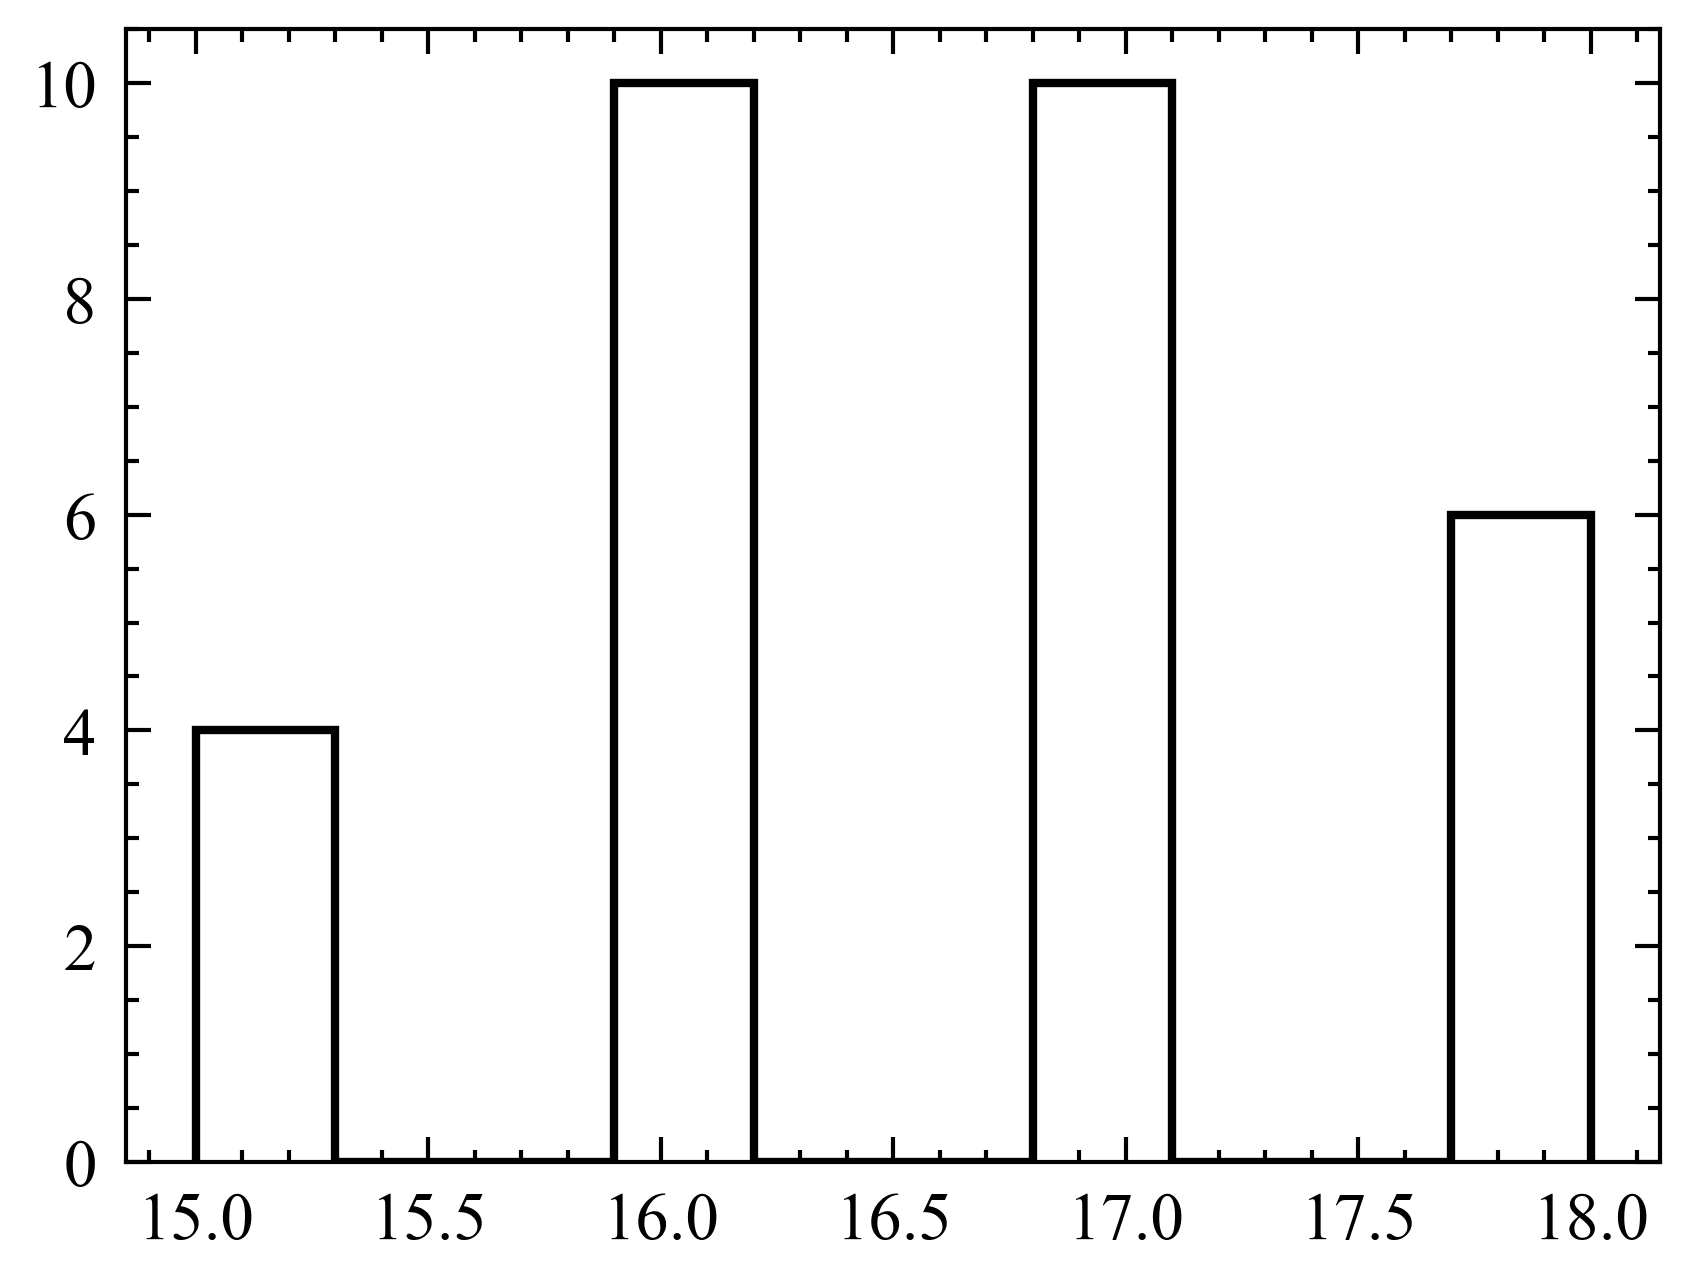

In [17]:
plt.hist(data[:,0], histtype='step')
plt.show()

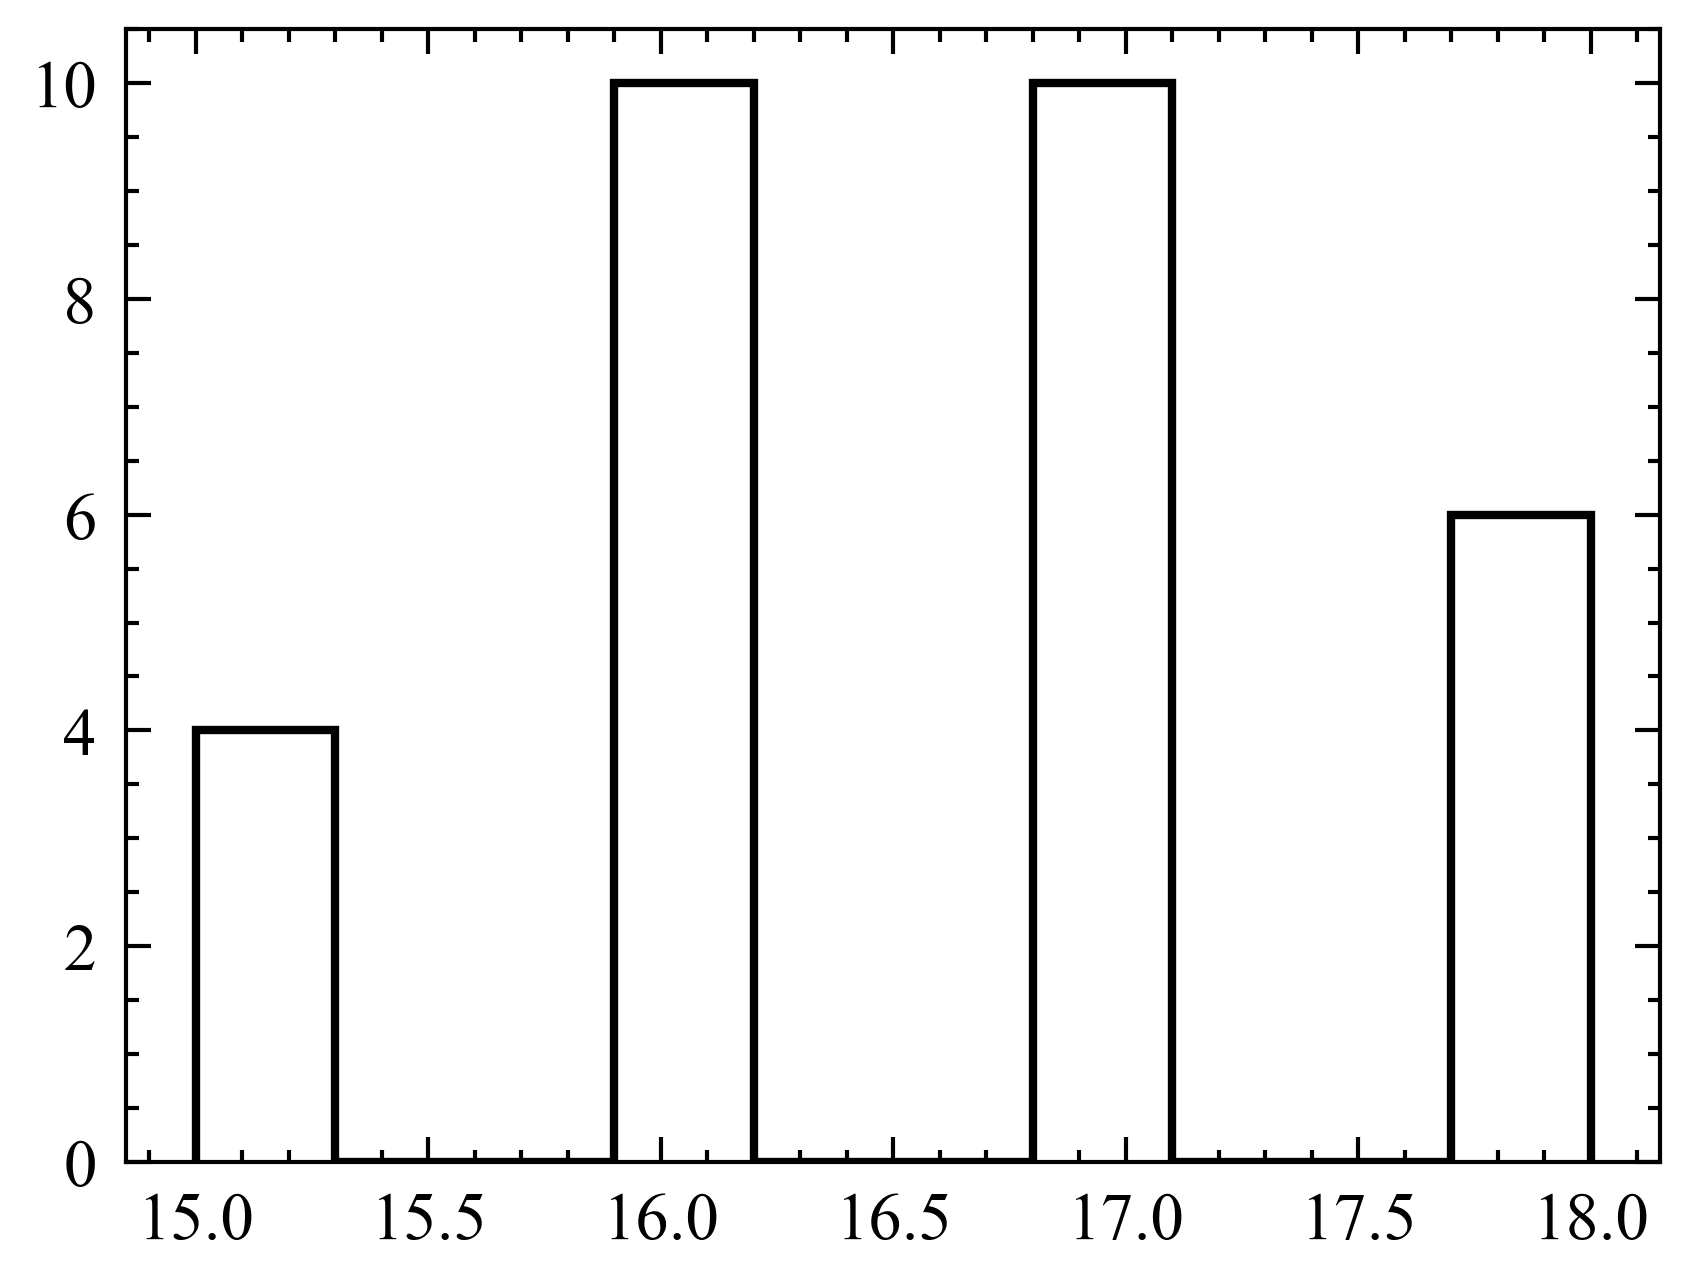

In [18]:
plt.hist(data[0:70,0], histtype='step')
plt.show()